# Dubai Real Estate Price Prediction Code
## Transactions Dataset EDA

- Kiana Johnson & Thomas Myers (Group 2B)
- CDS-492, Dr. Slamani

### "Dubai Real Estate Transactions Dataset":

This dataset includes over 1,000,000 entries of real estate transactions in Dubai. Each case provides location-specific features of each property transaction. With additional access to nearby landmarks, malls, and metro stations, we can use this dataset to dive deeper into how accessibility influences property price. We can also use it to further develop our model with more emphasis on these variables.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is essential for predicting real estate prices in Dubai, particularly when focusing on location-specific variables. Data visualization techniques, such as charts and graphs, offer clear insights into how location-related factors influence property value. This helps to enhances the understanding of proximity and provide potential predictors in property price.

In [1]:
# importing necessary packages:

# analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cleaning Raw Data

In [2]:
# loading in the uncleaned .csv dataset file
trans = pd.read_csv('transactions.csv') # transactions in dubai area

In [3]:
print(trans.head()) # viewing the first 5 rows of transaction data
print(trans.info()) # 1047965 entries, 46 columns:
# string: 'transaction_id', 'trans_group_ar', 'trans_group_en', 'procedure_name_ar', 'procedure_name_en', 'instance_date', 'property_type_ar', 'property_type_en', 'property_sub_type_ar', 'property_sub_type_en', 'property_usage_ar', 'property_usage_en', 'reg_type_ar', 'reg_type_en', 'area_name_ar', 'area_name_en', 'building_name_ar', 'building_name_en', 'project_name_ar', 'project_name_en', 'master_project_en', 'master_project_ar', 'nearest_landmark_ar', 'nearest_landmark_en', 'nearest_metro_ar', 'nearest_metro_en', 'nearest_mall_ar', 'nearest_mall_en', 'rooms_ar', 'rooms_en'
# integer: 'procedure_id', 'trans_group_id', 'property_type_id', 'reg_type_id', 'area_id', 'has_parking'
# float: 'property_sub_type_id', 'project_number', 'procedure_area', 'actual_worth', 'meter_sale_price', 'rent_value', 'meter_rent_price', 'no_of_parties_role_1', 'no_of_parties_role_2', 'no_of_parties_role_3'
print(trans.isnull().sum()) # checking for null values in data
# there are many null values for 'rent_value' and 'meter_rent_price', but that is because the properties are not being rented. i am focusing on the 'actual_worth' variable as my response.
trans.dropna(subset=['actual_worth'], inplace=True)

  transaction_id  procedure_id  trans_group_id trans_group_ar trans_group_en  \
0  1-11-2001-165            11               1        مبايعات          Sales   
1   3-9-2004-223             9               3           هبات          Gifts   
2  2-13-1996-119            13               2           رهون      Mortgages   
3  2-14-2005-222            14               2           رهون      Mortgages   
4   3-9-2012-874             9               3           هبات          Gifts   

  procedure_name_ar      procedure_name_en instance_date  property_type_id  \
0               بيع                   Sell    24-02-2001                 1   
1               هبه                  Grant    13-12-2004                 4   
2         تسجيل رهن  Mortgage Registration    12-03-2001                 1   
3         تعديل رهن        Modify Mortgage    20-09-2005                 2   
4               هبه                  Grant    11-10-2012                 4   

  property_type_ar  ... rooms_en  has_parking proc

In [4]:
# because there are identical columns written in both arabic and english, going to drop the columns in arabic
trans_drop_cols_ar = ['trans_group_ar', 'procedure_name_ar', 'property_type_ar', 'property_sub_type_ar', 'property_usage_ar', 'reg_type_ar', 'area_name_ar', 'building_name_ar', 'project_name_ar', 'master_project_ar', 'nearest_landmark_ar', 'nearest_metro_ar', 'nearest_mall_ar', 'rooms_ar']
trans.drop(columns = trans_drop_cols_ar, inplace = True)

# renaming all variables that end in 'en' (representing english) to a simpler name:
trans_cols = {'trans_group_en': 'trans_group',
    'procedure_name_en': 'procedure_name',
    'property_type_en': 'property_type',
    'property_sub_type_en': 'property_sub_type',
    'property_usage_en': 'property_usage',
    'reg_type_en': 'reg_type',
    'area_name_en': 'area_name',
    'building_name_en': 'building_name',
    'project_name_en': 'project_name',
    'master_project_en': 'master_project',
    'nearest_landmark_en': 'nearest_landmark',
    'nearest_metro_en': 'nearest_metro',
    'nearest_mall_en': 'nearest_mall',
    'rooms_en': 'rooms'}

trans.rename(columns = trans_cols, inplace = True)

# replacing the 1's and 0's in the 'has_parking' column with 'True' and 'False' boolean values
trans['has_parking'] = trans['has_parking'].astype(bool)

# adding a column that gives us the 'actual_worth' in USD rather than AED
trans['actual_worth_usd'] = trans['actual_worth'] * 0.27 # 0.27 is the exchange rate

In [5]:
# making 'instance_date' a date date type for easier use
trans['instance_date'] = pd.to_datetime(trans['instance_date'], format = '%d-%m-%Y')

# extracting year from date for more specific analysis
trans['year'] = trans['instance_date'].dt.year

# adding a column that converts the 'procedure_area' column in square meters to square feet

trans['procedure_area_sqft'] = trans['procedure_area'] * 10.7639

In [6]:
# dropping non important and redundant variables
trans.drop(columns=['transaction_id', 'procedure_id', 'trans_group_id', 'trans_group', 'procedure_name', 'instance_date', 'property_type_id', 'property_sub_type_id', 'reg_type_id', 'reg_type', 'area_id', 'area_name', 'building_name', 'project_number', 'master_project', 'meter_sale_price', 'rent_value', 'meter_rent_price', 'no_of_parties_role_1', 'no_of_parties_role_2', 'no_of_parties_role_3', 'property_usage', 'project_name', 'actual_worth', 'procedure_area'], inplace=True)

In [7]:
trans.to_csv('cleaned_transactions.csv', index = False) # saving clean data into a .csv file
print(trans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044160 entries, 0 to 1047964
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   property_type        1044160 non-null  object 
 1   property_sub_type    807657 non-null   object 
 2   nearest_landmark     918827 non-null   object 
 3   nearest_metro        808008 non-null   object 
 4   nearest_mall         802712 non-null   object 
 5   rooms                798981 non-null   object 
 6   has_parking          1044160 non-null  bool   
 7   actual_worth_usd     1044160 non-null  float64
 8   year                 1044155 non-null  float64
 9   procedure_area_sqft  1044160 non-null  float64
dtypes: bool(1), float64(3), object(6)
memory usage: 80.7+ MB
None


### Data Cleaning Summary:

- #### Raw Dataset: (46 columns, 1047965 entries)
    - Checked for both null and missing values (removed those within the 'actual_worth' variable (response variable))
    - Renamed columns so that they are both meaningful and easy to access
        - Dropped columns written in Arabic (there are equivalent columns written in English)
    - Casted the 'instance_date' column from a string to an date data type. Then extracted the 'year' from the data, because month and day are less important.
    - Converted the 'actual_worth' column to USD from AED.
    - Converted 'procedure_area' from meters to square feet ('procedure_area_sqft')
    - Casted 'has_parking' into a boolean variable (True & False in place of 1's & 0's)
    - Dropped unnecessary columns in context of analysis
        - 'transaction_id', 'procedure_id', 'trans_group_id', 'trans_group', 'procedure_name', 'instance_date', 'property_type_id', 'property_sub_type_id', 'reg_type_id', 'reg_type', 'area_id', 'area_name', 'building_name', 'project_number', 'master_project', 'no_of_parties_role_1', 'no_of_parties_role_2', & 'no_of_parties_role_3' because they contain information we no longer need
        - 'meter_sale_price', 'rent_value', 'meter_rent_price', & 'actual_worth' because it is a measurement of price, and is redundant to the target 'actual_worth_usd'
        - 'procedure_area' is a measurement of 'procedure_area_sqft'
    - Saved as a new .csv file 'cleaned_transactions.csv'
    
- #### Cleaned Dataset: (10 columns, 1044160 entries)
    - Data Types:
        - object: 'property_type', 'property_sub_type', 'nearest_landmark', 'nearest_mall', 'nearest_metro', 'rooms'
        - bool: 'has_parking'
        - float: 'actual_worth_usd', 'year' 'procedure_area_sqft', 

## Desciptive Analytics

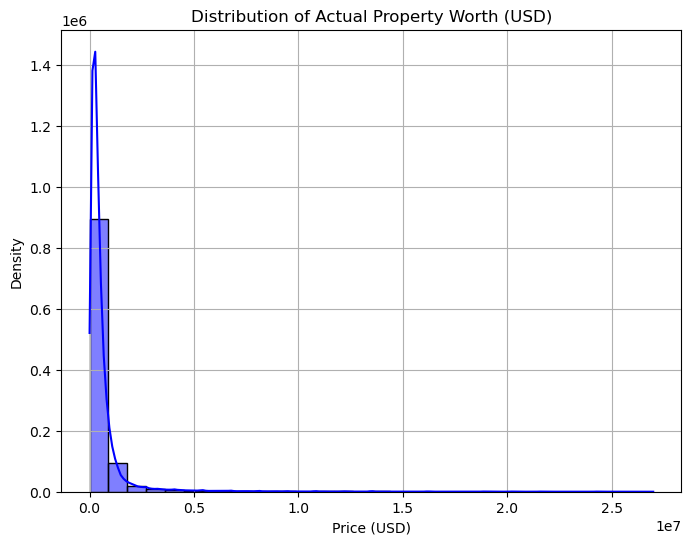

In [8]:
# observing the distribution of price, itself.
plt.figure(figsize=(8, 6))
sns.histplot(trans['actual_worth_usd'], kde=True, bins=30, color='blue', edgecolor='black')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.title('Distribution of Actual Property Worth (USD)')
plt.grid(True)
plt.show()

# extremely right skewed, needs outlier removal

In [9]:
# removing outliers
num_cols = ['actual_worth_usd', 'procedure_area_sqft']

# defining function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# remove outliers
trans = remove_outliers(trans, num_cols)

In [10]:
# removing prices that are $0
trans = trans[trans['actual_worth_usd'] > 0].copy()

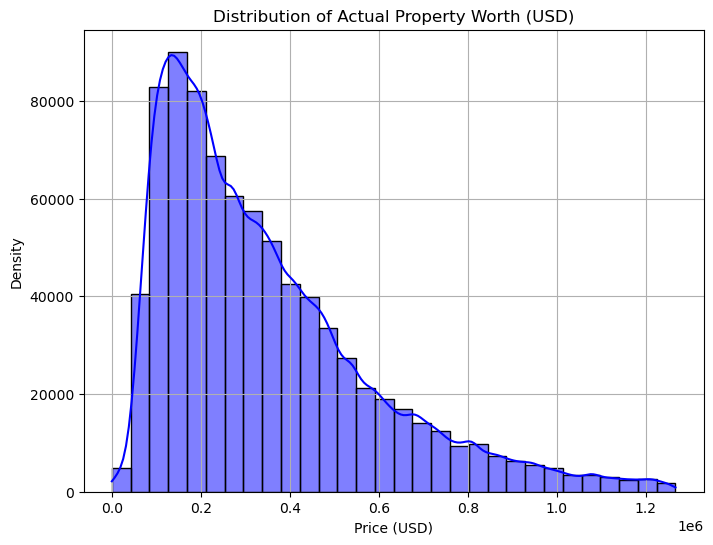

In [11]:
# observing the distribution of price to confirm that all necessary outliers are removed
plt.figure(figsize=(8, 6))
sns.histplot(trans['actual_worth_usd'], kde=True, bins=30, color='blue', edgecolor='black')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.title('Distribution of Actual Property Worth (USD)')
plt.grid(True)
plt.show()

In [12]:
trans.to_csv('out_transactions.csv', index = False) # saving clean data into a .csv file
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824901 entries, 5 to 1047964
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   property_type        824901 non-null  object 
 1   property_sub_type    774479 non-null  object 
 2   nearest_landmark     735151 non-null  object 
 3   nearest_metro        648669 non-null  object 
 4   nearest_mall         645613 non-null  object 
 5   rooms                766617 non-null  object 
 6   has_parking          824901 non-null  bool   
 7   actual_worth_usd     824901 non-null  float64
 8   year                 824899 non-null  float64
 9   procedure_area_sqft  824901 non-null  float64
dtypes: bool(1), float64(3), object(6)
memory usage: 63.7+ MB


### DA - Snapshot (1):

- Graphed the distribution of actual property worth (USD) and discovered severe right-skewedness in the data, so removed outliers with a function using the IQR method.
- Graphed again to ensure that necessary outliers were removed.
    - Still discovered right-skewedness, but will not further tamper with the data due to valid data points still included.
    - Must keep in mind that mean will be greater than median in further analysis
- Saved as another .csv file ('out_transactions.csv)
- #### Outlier Removed Dataset: (10 columns, 824901 entries)

In [13]:
# generating a summary statistics report for each of the numerical value columns
trans.describe().round(2)

# generating a summary statistics report for each of the categorical value columns
print(trans.describe(include = 'object'))

       property_type property_sub_type              nearest_landmark  \
count         824901            774479                        735151   
unique             4                14                            14   
top             Unit              Flat  Sports City Swimming Academy   
freq          696519            595969                        191679   

                               nearest_metro nearest_mall   rooms  
count                                 648669       645613  766617  
unique                                    56            5      13  
top     Buj Khalifa Dubai Mall Metro Station  Marina Mall   1 B/R  
freq                                   75721       300131  259096  


/var/folders/j9/hbqcn43j673gxw7nrdsvfkfh0000gn/T/ipykernel_11988/1171889169.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trans_corr_mx = trans.corr()


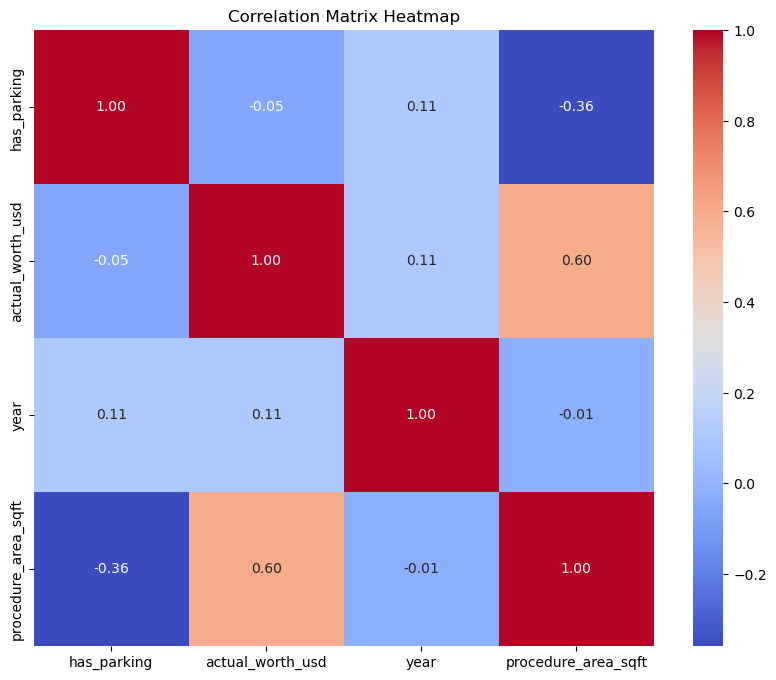

In [19]:
# generating a correlation matrix to see which variables have associations with each other
trans_corr_mx = trans.corr()

# plotting matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(trans_corr_mx, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

# shows a strong correlation and relationship between 'actual_worth_usd' and 'procedure_area_sqft' 

In [15]:
# exploring the data's categorical variables to see their influence on 'actual_worth'

trans_cat_cols = ['nearest_landmark', 'nearest_mall', 'property_type', 'property_sub_type']

# seeing what the unique values are for each categorical column
for col in trans_cat_cols:
    trans_cat_unique = trans[col].unique()
    num_unique = len(trans_cat_unique)
    print(col, ':', num_unique)
    print(trans_cat_unique)
    print()

nearest_landmark : 15
['Burj Khalifa' 'Dubai International Airport' nan
 'Sports City Swimming Academy' 'IMG World Adventures' 'Motor City'
 'Expo 2020 Site' 'Burj Al Arab' 'Dubai Cycling Course' 'Downtown Dubai'
 'Global Village' 'Al Makhtoum International Airport'
 'Hamdan Sports Complex' 'Jabel Ali' 'Dubai Parks and Resorts']

nearest_mall : 6
['Dubai Mall' nan 'City Centre Mirdif' 'Marina Mall'
 'Mall of the Emirates' 'Ibn-e-Battuta Mall']

property_type : 4
['Building' 'Land' 'Villa' 'Unit']

property_sub_type : 15
[nan 'Villa' 'Flat' 'Shop' 'Office' 'Hotel Apartment' 'Workshop'
 'Hotel Rooms' 'Stacked Townhouses' 'Clinic' 'Store' 'Gymnasium'
 'Show Rooms' 'Parking' 'Warehouse']



In [16]:
# grouping by each of the landmarks to see their influence on price in USD
trans_landmark_stats = trans.groupby('nearest_landmark')['actual_worth_usd'].describe()
print(trans_landmark_stats)

# grouping by each of the malls to see their influence on price in USD
trans_mall_stats = trans.groupby('nearest_mall')['actual_worth_usd'].describe()
print(trans_mall_stats)

# grouping by each of the property types to see their influence on price in USD
trans_prop_type_stats = trans.groupby('property_type')['actual_worth_usd'].describe()
print(trans_prop_type_stats)

# grouping by each of the property sub types to see their influence on price USD
trans_sub_type_stats = trans.groupby('property_sub_type')['actual_worth_usd'].describe()
print(trans_sub_type_stats)

# grouping by each of the nearest metros to see their influence on price USD
trans_metro_stats = trans.groupby('nearest_metro')['actual_worth_usd'].describe()
print(trans_metro_stats)

                                      count           mean            std  \
nearest_landmark                                                            
Al Makhtoum International Airport    3911.0  301614.823915   85292.632207   
Burj Al Arab                       171122.0  412432.009051  239347.389093   
Burj Khalifa                        38609.0  602152.258402  268390.194143   
Downtown Dubai                     117818.0  392915.416961  230720.308431   
Dubai Cycling Course                30712.0  377715.833220  170302.352189   
Dubai International Airport         36337.0  374746.246087  279186.678775   
Dubai Parks and Resorts              1137.0  336313.271398  191529.221040   
Expo 2020 Site                      22496.0  262002.788421  200374.194605   
Global Village                       6950.0  476297.375452  216883.526306   
Hamdan Sports Complex                4090.0  442106.289858  137500.170518   
IMG World Adventures                52969.0  227949.774562  182020.038886   

### DA - Snapshot (2):

- Generated a summary statistics report for both categorical and numerical variables to observe statistics
- #### Correlation Matrix Heatmap:
    - This correlation matrix heatmap displays all correlation values for each numerical variable combination. It shows a strong correlation and relationship between 'actual_worth_usd' and 'procedure_area_sqft'
    
- Grouped each of the landmarks, malls, property types, and property sub-types and derived statistics for each individual subvariable

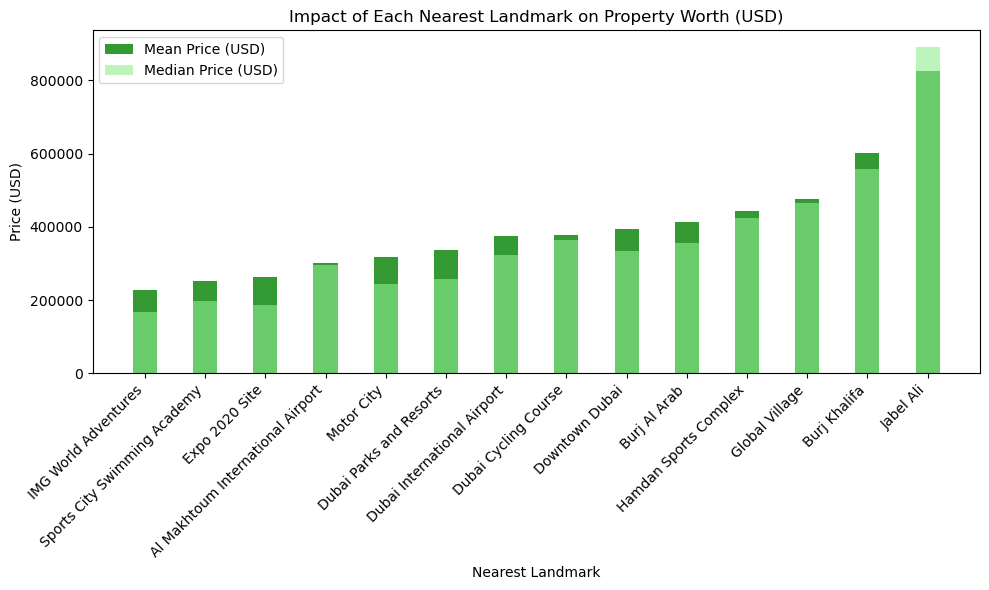

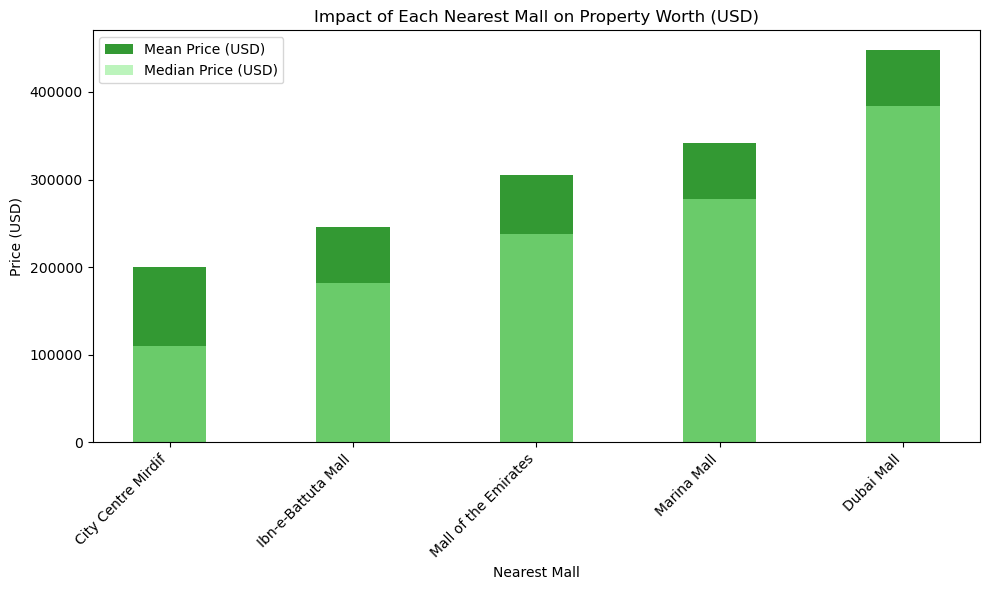

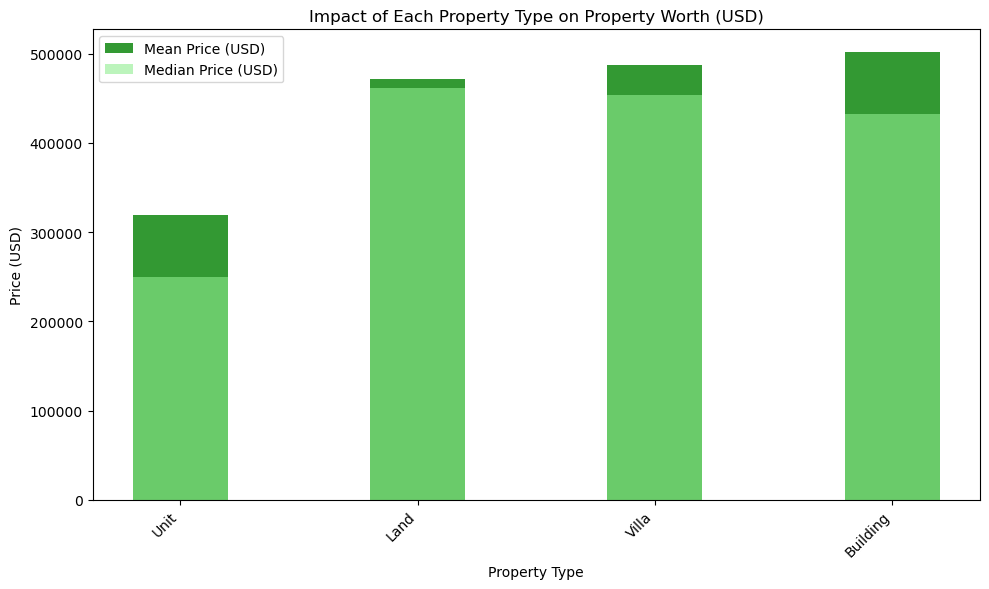

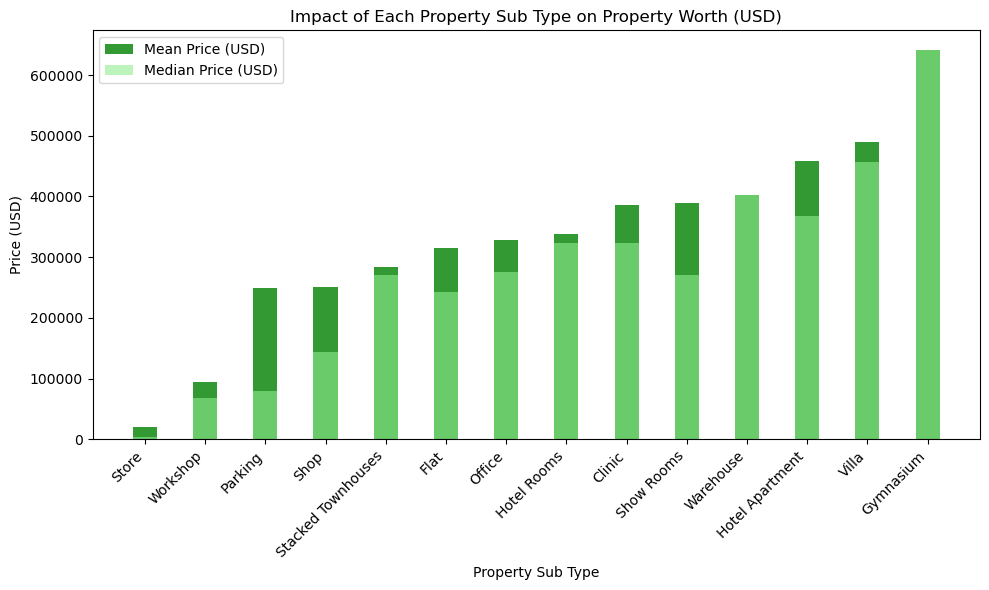

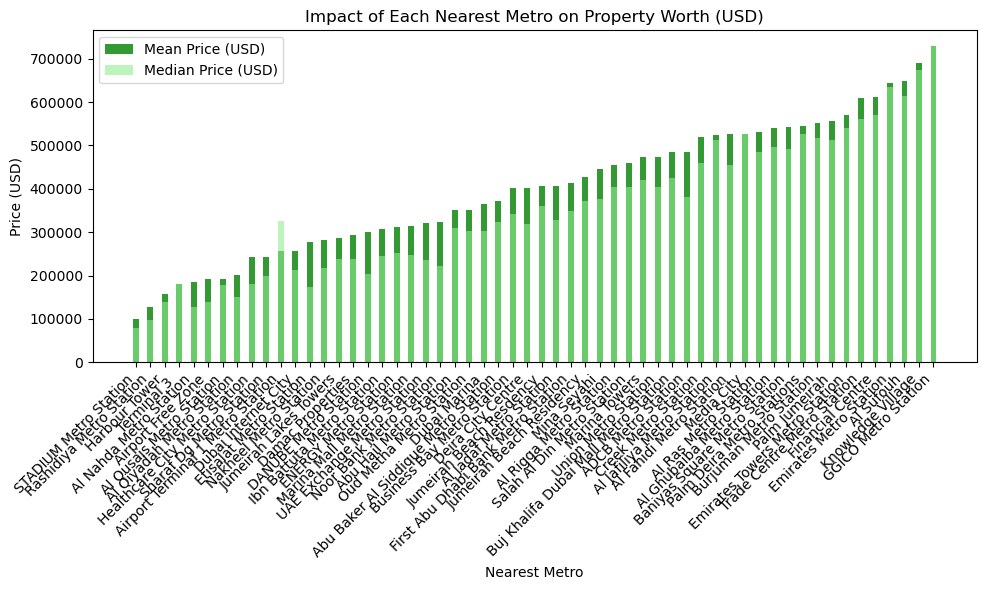

In [17]:
# list of categorical variables of interest
categorical_vars = ['nearest_landmark', 'nearest_mall', 'property_type', 'property_sub_type', 'nearest_metro']

# loop thru each variable
for var in categorical_vars:
    # mean and median of 'actual_worth_usd' by the current categorical variable
    group_mean = trans.groupby(var)['actual_worth_usd'].mean().sort_values()
    group_median = trans.groupby(var)['actual_worth_usd'].median().reindex(group_mean.index)  # Reindex to align with mean
    
    # plotting
    plt.figure(figsize=(10, 6))
    
    x_pos = range(len(group_mean))
    plt.bar(x_pos, group_mean, color='green', alpha=0.8, width=0.4, label='Mean Price (USD)')
    plt.bar(x_pos, group_median, color='lightgreen', alpha=0.6, width=0.4, label='Median Price (USD)')
    
    plt.title(f'Impact of Each {var.replace("_", " ").title()} on Property Worth (USD)')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45, ha='right', ticks=x_pos, labels=group_mean.index)
    plt.legend()
    plt.tight_layout()
    plt.show()

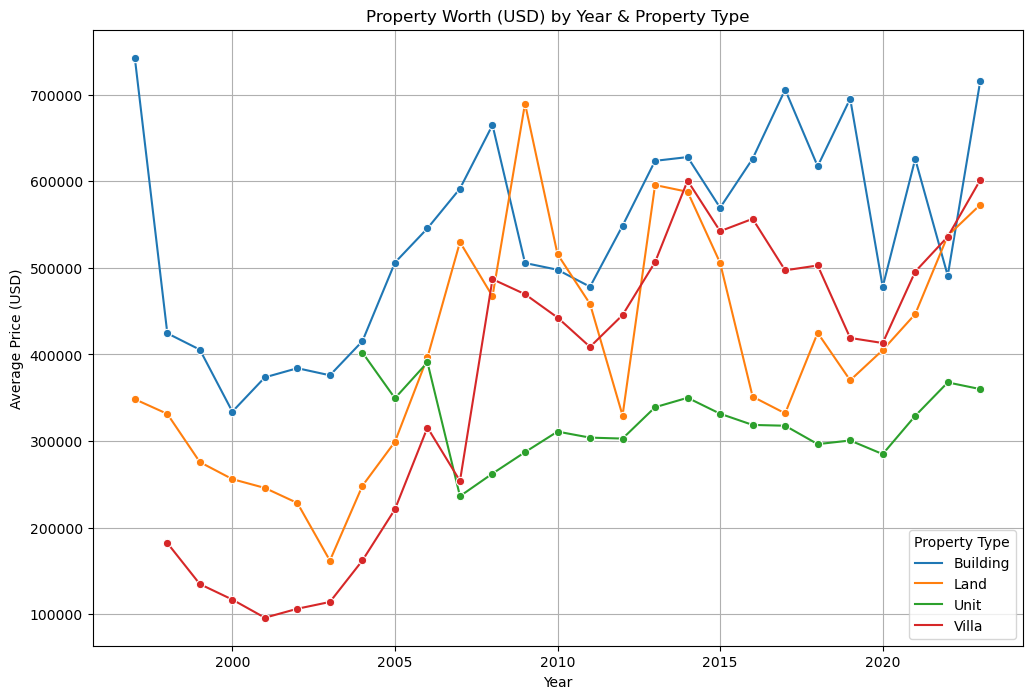

In [21]:
# observing how the 'actual_value_usd' changes by year, when grouped by different variables of interest:

## calculate mean 'actual_worth_usd' for each 'year' and 'property_type' ##
trans_prop_year_values = trans.groupby(['property_type', 'year'])['actual_worth_usd'].mean().reset_index()

# combining graphs for easier comparison
plt.figure(figsize = (12, 8))
sns.lineplot(x = 'year', y = 'actual_worth_usd', hue = 'property_type', data = trans_prop_year_values, marker = 'o')
plt.title('Property Worth (USD) by Year & Property Type')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.legend(title = 'Property Type')
plt.show()

## calculate mean 'actual_worth_usd' for each 'year' and 'property_type' ##
trans_mall_year_values = trans.groupby(['nearest_mall', 'year'])['actual_worth_usd'].mean().reset_index()

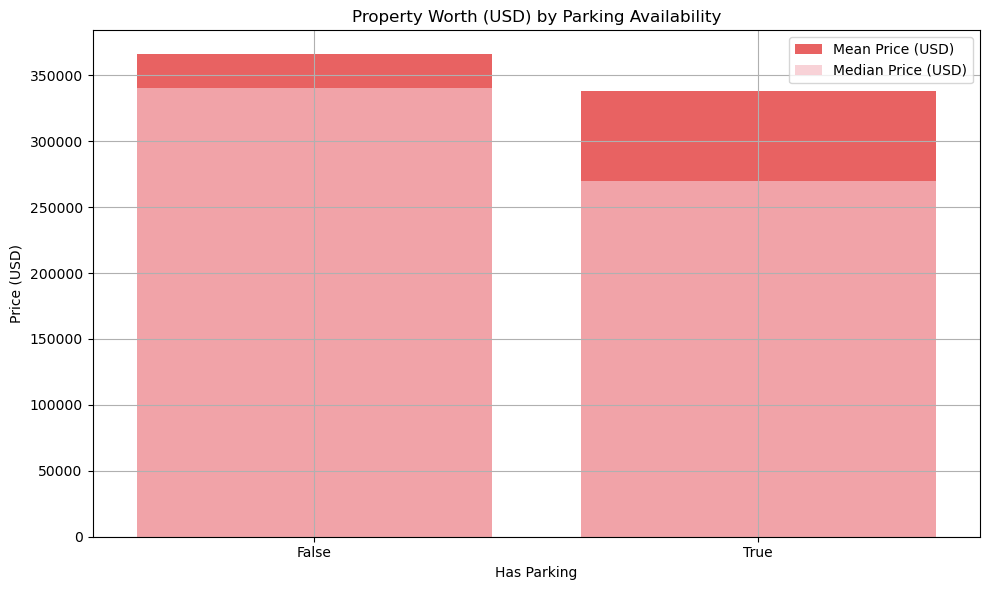

In [22]:
# calculate mean and median of 'actual_worth_usd' by 'has_parking'
group_mean = trans.groupby('has_parking')['actual_worth_usd'].mean().reset_index()
group_median = trans.groupby('has_parking')['actual_worth_usd'].median().reset_index()

# plotting
plt.figure(figsize=(10, 6))

sns.barplot(x='has_parking', y='actual_worth_usd', data=group_mean, color='red', alpha=0.7, label='Mean Price (USD)')
sns.barplot(x='has_parking', y='actual_worth_usd', data=group_median, color='lightpink', alpha=0.7, label='Median Price (USD)')

plt.title('Property Worth (USD) by Parking Availability')
plt.xlabel('Has Parking')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

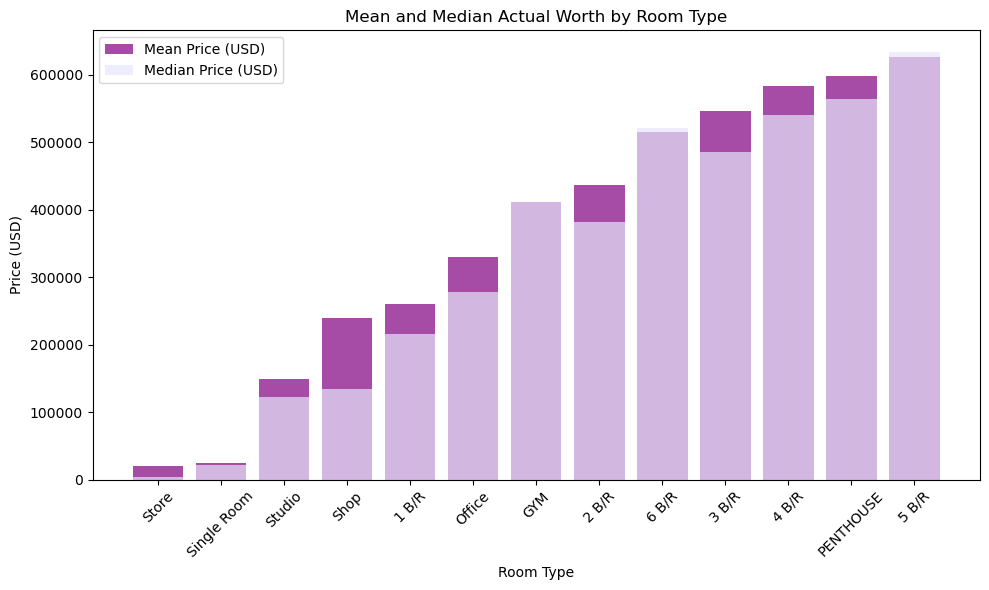

In [25]:
# dropping rows with null values in 'rooms' to graph clearly
trans_rooms = trans.dropna(subset=['rooms'])

# mean and median of 'actual_worth_usd' by 'rooms'
group_mean = trans_rooms.groupby('rooms')['actual_worth_usd'].mean().reset_index()
group_median = trans_rooms.groupby('rooms')['actual_worth_usd'].median().reset_index()

# ordering
group_mean = group_mean.sort_values(by='actual_worth_usd', ascending=True)

# plotting
plt.figure(figsize=(10, 6))

plt.bar(group_mean['rooms'], group_mean['actual_worth_usd'], color='purple', alpha=0.7, label='Mean Price (USD)')
plt.bar(group_median['rooms'], group_median['actual_worth_usd'], color='lavender', alpha=0.7, label='Median Price (USD)')

plt.title('Mean and Median Actual Worth by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### DA - Snapshot (3):

- #### Stacked Barchart: ('actual_worth' combined with 'nearest_landmark', 'nearest_mall', 'property_type', 'property_sub_type', & 'nearest_metro')
    - Proximity to landmarks such as major airports and iconic structures like Burj Khalifa tends to increases property values.
    - Properties near major malls like Dubai Mall and Mall of the Emirates have higher prices.
    - Large buildings, particularly hotels and sized partitions, show a large impact on property values.
    - Metro stations like Union Metro Station, Al Rigga Metro Station, and Al Fahidi Metro Station have higher property values.
- #### Multiple Line Chart: ('Property Worth (USD) by Year & Property Type') 
    -  'Building' starts off strong but oscillates between the values 750,000 USD and a little below 500,000 USD, as the most expensive. The 'Villa', starts at the lowest average of just under 200,000 USD, but steadily increases to an average of roughly 620,000 USD by the 2020's.
    - 'year' has impacted and changed property prices dramatically in Dubai, making it a relevant predictive variable to consider.
- #### Stacked Barchart: ('Property Worth (USD) by Parking Availability')
    - Unexpectedly, properties with no parking are priced higher than those that do have parking availability. However, this could make sense due to the many metro stations nearby, or that more expensive areas have limited space and are in higher demand for that reason.
    - 'has_parking' can be used as a potential predictor for modeling.
- #### Stacked Barchart: ('Mean and Median Actual Worth by Room Type')
    - The most expensive being '5 B/R', 'PENTHOUSE', and 'GYM', while the cheapest is 'Store', 'Single Room', and 'Studio'. The positive relationship associated with price and the 'rooms' variable makes it a great contender to serve as a predictor for the model.

### EDA Findings:

- #### Predictors to Test:
    - 'nearest_landmark', 'nearest_mall', 'property_type', 'property_sub_type', 'rooms', 'has_parking'